#📌 Carga de datos json

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
datos = pd.read_json(url)

In [2]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# ** Nomalizando datos **

In [3]:
import pandas as pd

# Cargar el JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
datos = pd.read_json(url)

# Normalizar cada columna anidada y combinar
df_normalizado = pd.concat([
    datos[['customerID', 'Churn']],  # Columnas no anidadas
    pd.json_normalize(datos['customer']),  # Datos del cliente
    pd.json_normalize(datos['phone']),     # Servicio de teléfono
    pd.json_normalize(datos['internet']),  # Servicio de internet
    pd.json_normalize(datos['account'])    # Datos de la cuenta (excepto 'Charges')
], axis=1)

# Normalizar 'Charges' (si está dentro de 'Account')
if 'Charges' in df_normalizado.columns:
    cargos = pd.json_normalize(df_normalizado['Charges'])
    cargos.columns = [f'Cargos_{col}' for col in cargos.columns]
    df_final = pd.concat([df_normalizado.drop('Charges', axis=1), cargos], axis=1)
else:
    df_final = df_normalizado

# Resultado
print(df_final.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [4]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# ** Limpieza de datos vacios nulos nun

In [5]:
# Cuántas filas tienen al menos un valor nulo (NaN)

df_final.isnull().any(axis=1).sum()

np.int64(0)

In [6]:
 # Cuántas filas tienen al menos una celda vacía ('')
 (df_final == '').any(axis=1).sum()

np.int64(224)

In [7]:
# Verificacion con código de la columna con datos NaN o ''

columnas_con_vacios = df_final.columns[(df_final.isnull().any()) | ((df_final == '').any())]
print("Columnas con valores nulos o vacíos:", columnas_con_vacios.tolist())

Columnas con valores nulos o vacíos: ['Churn']


In [ ]:
# Las 11 filas que tienen valores Nannulos o vacíos, todas tienen Charges.Total = NaN y
# todas tienen tenure = 0 (permanencia), lo que indica que son clientes recién inscritos que aún no
# han acumulado cargos totales Charges Total.
# Como son pocos se eliminaran ya que no aportan informacion útil.

In [ ]:
# df = df[~df.index.isin([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599])]

In [8]:
df_final = df_final[~df_final['Charges.Total'].isnull()]

In [9]:
# Verificando si hay valores vacios y nulos en el dataframe final

df_final.isnull().sum().sum()         # Total de nulos = 0
(df_final == '').sum().sum()          # Total de vacíos = 0 este aun tiene 224 datos vacios

np.int64(224)

In [100]:
# Si hay duplicados
print("Numero de duplicados", df_modelo_final.duplicated().sum())

Numero de duplicados 0


In [10]:
# Verificando en el columna estan los valores vacios es la Churn
vacios_por_columna = (df_final == '').sum()
print(vacios_por_columna[vacios_por_columna > 0])  # Solo columnas con vacíos

Churn    224
dtype: int64


In [ ]:
# Eliminacion de valores vacios // Se elimina los Churn vacíos ya que son preguintas sin respuestas

In [21]:
# df_modelo es una data frame con los churn no vacios // en este dataframe se limpiaron los datos NaN y los vacios ''
df_modelo_final = df_final[df_final['Churn'] != ''].copy()

In [22]:
(df_modelo_final == '').sum().sum()

np.int64(0)

In [34]:
# Verificacion que ya no hay vacios df_modelo_final
# Filtra las filas que tienen al menos una celda vacía (cadena vacía '')
filas_vacias = df_modelo_final[(df_modelo_final == '').any(axis=1)]

# Ahora puedes ver la lista de estas filas
print(f"Se encontraron {len(filas_vacias)} registros con al menos una celda vacía (''):\n")


Se encontraron 0 registros con al menos una celda vacía (''):



In [101]:
# Verifique si hay tipo valores en columnas
for col in df_modelo_final.columns:
  print(f"valores únicos en la columna'{col}': {df_modelo_final[col].nunique()}")
  if df_modelo_final[col].nunique() < 50:
    print(df_modelo_final[col].unique())
    print('-' * 50)

valores únicos en la columna'customerID': 7043
valores únicos en la columna'Churn': 2
['No' 'Yes']
--------------------------------------------------
valores únicos en la columna'gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'tenure': 73
valores únicos en la columna'PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores únicos e

In [99]:
print("Numero de duplicados", df_modelo_final.duplicated().sum())

Numero de duplicados 0


# ** Aplicar cambios en los tipos de datos **

In [37]:
columnas = list(df_modelo_final.columns)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [38]:
# Tipos de datos
df_modelo_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [39]:
import pandas as pd
df = df_modelo_final    # Cambio el nombre a dataframe

# Diccionario de conversión de tipos
dtype_mapping = {
    'Churn': 'category',
    'gender': 'category',
    'SeniorCitizen': 'int8',
    'Partner': 'category',
    'Dependents': 'category',
    'tenure': 'int16',
    'PhoneService': 'category',
    'MultipleLines': 'category',
    'InternetService': 'category',
    'OnlineSecurity': 'category',
    'OnlineBackup': 'category',
    'DeviceProtection': 'category',
    'TechSupport': 'category',
    'StreamingTV': 'category',
    'StreamingMovies': 'category',
    'Contract': 'category',
    'PaperlessBilling': 'category',
    'PaymentMethod': 'category',
    'Charges.Monthly': 'float32',
    'Charges.Total': 'float32'  # Primero convertir a numérico
}

# Convertir 'Charges.Total' a numérico (manejando errores si hay strings no numéricos)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Aplicar todos los tipos
df = df.astype(dtype_mapping)

# Verificar memoria optimizada
print(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   category
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int8    
 4   Partner           7043 non-null   category
 5   Dependents        7043 non-null   category
 6   tenure            7043 non-null   int16   
 7   PhoneService      7043 non-null   category
 8   MultipleLines     7043 non-null   category
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
 16  Contract          7043 non-nu

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   category
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int8    
 4   Partner           7043 non-null   category
 5   Dependents        7043 non-null   category
 6   tenure            7043 non-null   int16   
 7   PhoneService      7043 non-null   category
 8   MultipleLines     7043 non-null   category
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
 16  Contract          7043 non-nu

#🔧 Comenzando con el análisis / Gráficos

In [43]:
# Análisis comparativo
print("\nDistribución original:")
print(df['Churn'].value_counts(dropna=False))



Distribución original:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


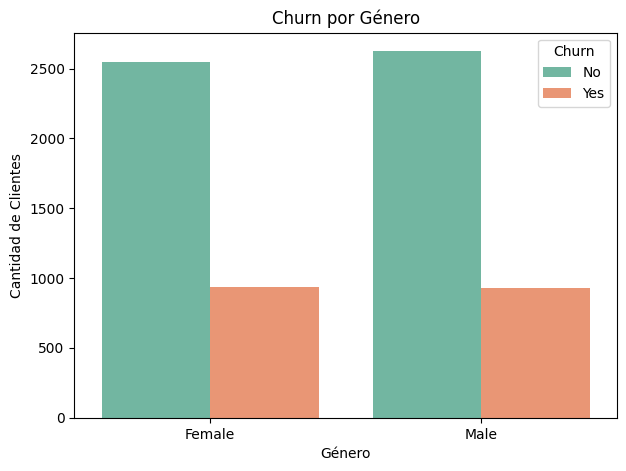

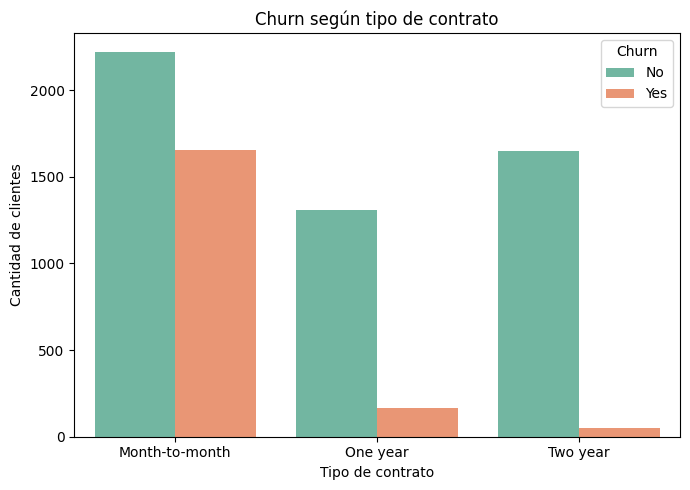

In [77]:
# Graficos numero de clientes vs genero y numero de clientes vs tipo de contrato
# Ejemplo con 'gender' (Por género)
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.show()

# Ejemplo con 'ContractType' (Por tipo de Contrato)

plt.figure(figsize=(7,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn según tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Tipo de contrato')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

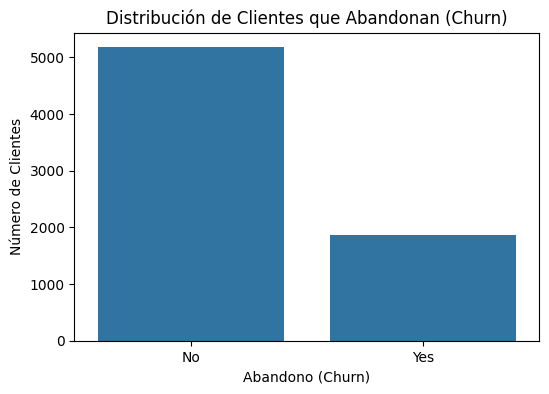

In [80]:
# Distribución de Clientes que Abandonan (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Clientes que Abandonan (Churn)')
plt.xlabel('Abandono (Churn)')
plt.ylabel('Número de Clientes')
plt.show()

In [49]:
# Cuál es el porcentaje de clientes que se van (Yes) y los que se quedan (No)
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


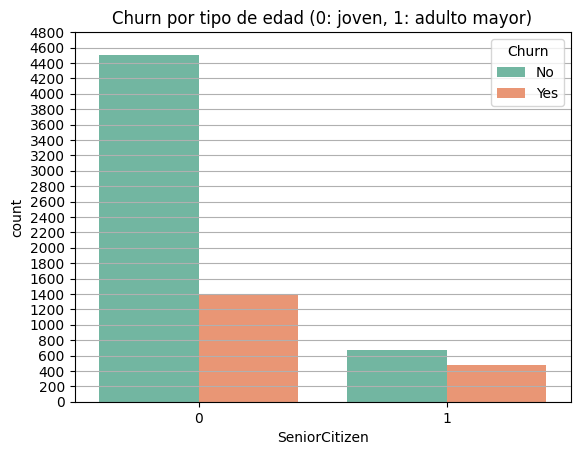

In [81]:
# Grafico tasa de Churn por rango //  0: joven, 1: adulto mayor //
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set2')
plt.title('Churn por tipo de edad (0: joven, 1: adulto mayor)')
plt.grid(axis='y')
plt.yticks(ticks=range(0, 5000, 200))  # Desde 0 hasta 600 cada 100 unidades
plt.show()

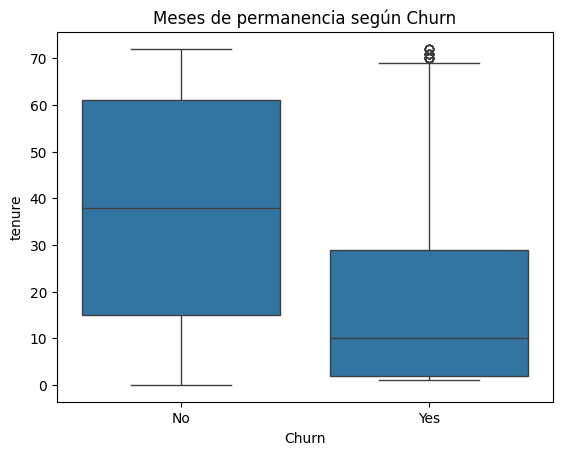

In [51]:
# Muestra un gráfico de cajas (boxplot) que compara los meses de permanencia (tenure)
# de los clientes según si renunciaron (Churn = Yes) o se quedaron (Churn = No)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Meses de permanencia según Churn')
plt.show()

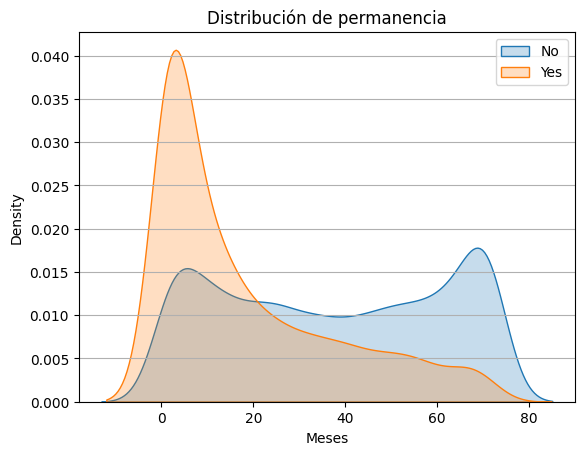

In [52]:
# Grafico de densidad // Esto te muestra si los que se quedan tienen más tiempo de permanencia y cómo varía.
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], label='No', fill=True)
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], label='Yes', fill=True)
plt.title('Distribución de permanencia')
plt.xlabel('Meses')
plt.legend()
plt.grid(axis='y')

plt.show()

In [82]:
# Agrupar a los que tienen tenure > 60 ver sus características más comunes.Los que se quedan mas tiempo.

clientes_fieles = df[df['tenure'] >= 60]
clientes_fieles['Contract'].value_counts(normalize=True) * 100
clientes_fieles['PaymentMethod'].value_counts(normalize=True) * 100

,proportion
PaymentMethod,
Bank transfer (automatic),36.884693
Credit card (automatic),35.603506
Electronic check,18.071477
Mailed check,9.440324


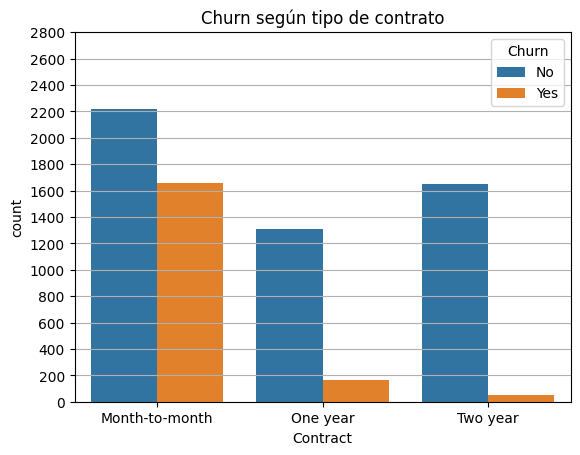

In [54]:
# Variable Contract o contrato que se relaciona con Churn.

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn según tipo de contrato')
plt.grid(axis='y')
plt.yticks(ticks=range(0, 3000, 200))  # Desde 0 hasta 600 cada 100 unidades
plt.show()

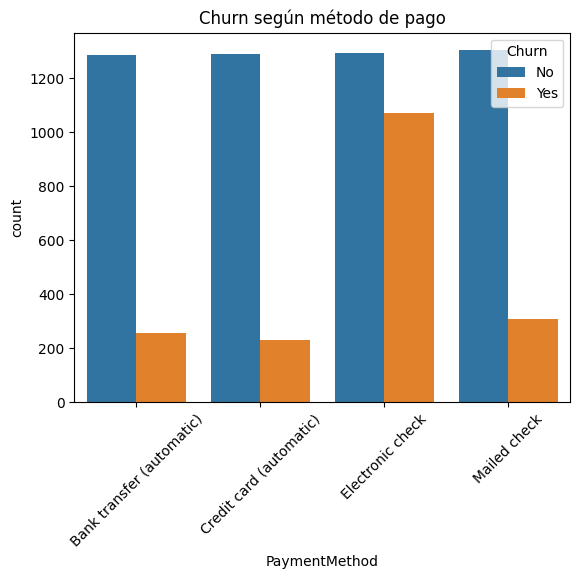

In [55]:
# Por métodos de pagos

sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn según método de pago')
plt.xticks(rotation=45)
plt.show()

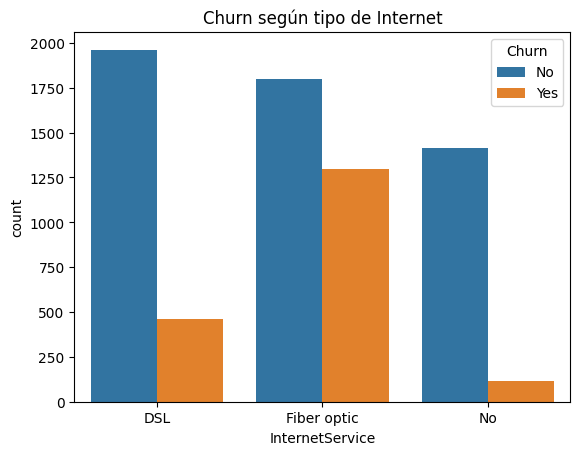

In [56]:
# Por internetService

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn según tipo de Internet')
plt.show()

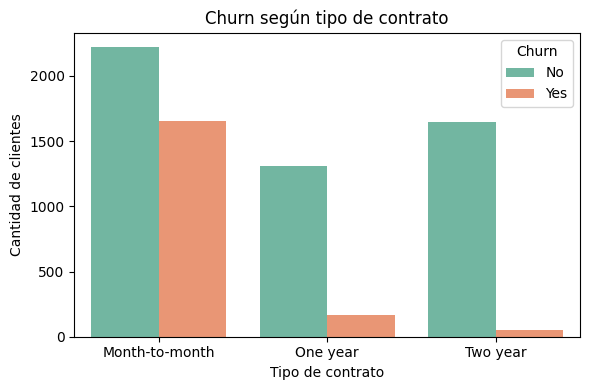

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn según tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Tipo de contrato')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

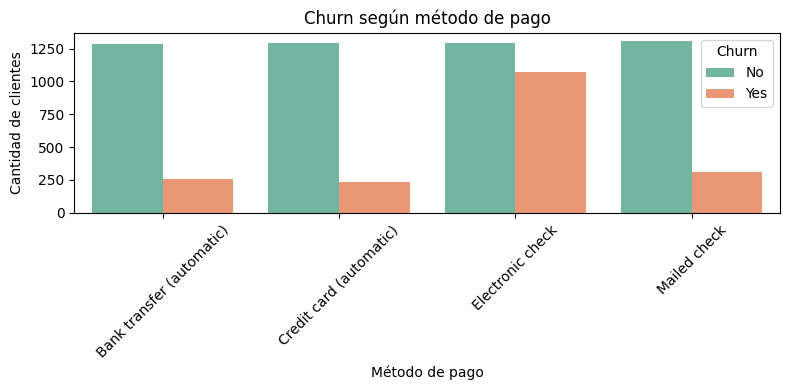

In [58]:
# “Electronic check” es el método de pago donde más clientes aparecen como mas Churn.

plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2')
plt.title('Churn según método de pago')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Método de pago')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Tabla cruzada para ver el patrón 'Contrato + método de pago + churn'.
tabla = pd.crosstab(index=df['Contract'], columns=[df['PaymentMethod'], df['Churn']])
print(tabla)

PaymentMethod  Bank transfer (automatic)      Credit card (automatic)       \
Churn                                 No  Yes                      No  Yes   
Contract                                                                     
Month-to-month                       388  201                     365  178   
One year                             353   38                     357   41   
Two year                             545   19                     568   13   

PaymentMethod  Electronic check      Mailed check       
Churn                        No  Yes           No  Yes  
Contract                                                
Month-to-month              856  994          611  282  
One year                    283   64          314   23  
Two year                    155   13          379    3  


In [86]:
tabla = pd.crosstab(index=df['Contract'], columns=[df['tenure'], df['Churn']])
print(tabla)

tenure          0    1         2        3       4       5   ...  68      69  \
Churn           No   No  Yes   No  Yes  No Yes  No Yes  No  ...  No Yes  No   
Contract                                                    ...               
Month-to-month   0  224  380  109  121  97  94  83  82  65  ...   7   3   3   
One year         1    7    0    5    2   6   0   6   1   3  ...  21   4  20   
Two year        10    2    0    1    0   3   0   4   0   1  ...  63   2  64   

tenure              70       71       72      
Churn          Yes  No Yes   No Yes   No Yes  
Contract                                      
Month-to-month   3   3   1    4   1    2   0  
One year         3  22   5   28   0   15   2  
Two year         2  83   5  132   5  339   4  

[3 rows x 145 columns]


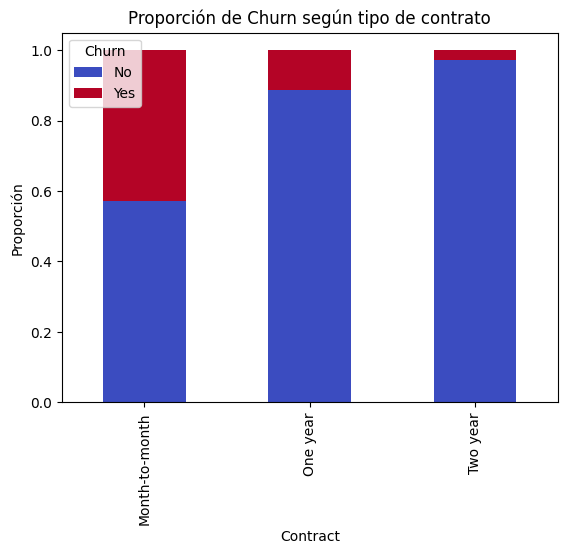

In [60]:
# Gráfico
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proporción de Churn según tipo de contrato')
plt.ylabel('Proporción')
plt.show()

In [83]:
# Suponiendo que 'Churn' tiene valores 'Yes'/'No' (o 1/0)
total_clientes = len(df)  # Usamos el dataset limpio (sin vacíos)
clientes_abandono = df['Churn'].value_counts()['Yes']  # Ajusta según tus categorías

churn_rate = (clientes_abandono / total_clientes) * 100
print(f"🔴 Tasa de abandono (Churn Rate): {churn_rate:.2f}%")

🔴 Tasa de abandono (Churn Rate): 26.54%


#📄Informe final

In [90]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761688,2283.300537
std,0.368612,24.559481,30.090000,2266.771729
min,0.000000,0.000000,18.250000,18.799999
25%,0.000000,9.000000,35.500000,401.450012
50%,0.000000,29.000000,70.349998,1397.475098
75%,0.000000,55.000000,89.849998,3794.737549
max,1.000000,72.000000,118.750000,8684.799805


In [105]:
import pandas as pd

# 1. Convertir "Yes"/"No" a 1/0 (opcional, pero útil para cálculos)
df_modelo_final['Churn_num'] = df_modelo_final['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 2. Análisis rápido (comparación de promedios)
resultado = df_modelo_final.groupby('Churn').mean(numeric_only=True)
resultado.loc['Diferencia'] = resultado.loc['Yes'] - resultado.loc['No']  # Filas: Yes vs No

print(resultado.T.sort_values('Diferencia', ascending=False))

Churn                     No          Yes   Diferencia
Charges.Monthly    61.265124    74.441332    13.176209
Churn_num           0.000000     1.000000     1.000000
SeniorCitizen       0.128721     0.254682     0.125961
tenure             37.569965    17.979133   -19.590832
Charges.Total    2555.344141  1531.796094 -1023.548047
